In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Displays plots directly in the Jupyter frontend cells
%matplotlib inline

# Allows splitting of datasets
from sklearn.model_selection import train_test_split

# StandardScaler scales by subtracting mean and dividing by standard deviation
# MinMaxScaler scales by subtracting minimum from feature value and divides by range 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Encodes categories by assigning unique category a value
from sklearn.preprocessing import OrdinalEncoder 

# LinearSVC generates a linear support vector classifier
# SVC allows us to choose from a variety of non-linear kernels 
from sklearn.svm import LinearSVC, SVC 


from sklearn.metrics import accuracy_score

In [2]:
auto_mpg_df = pd.read_csv('Car details v3.csv')

In [3]:
auto_mpg_df = auto_mpg_df.drop(['torque'], axis = 1)

In [4]:
auto_mpg_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


### Checking Null Values



In [5]:
auto_mpg_df.isnull().sum() 

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [6]:
#As we can see from above, there are missing values in the 'mileage', 'engine', 'max_power', and 'seats' columns of our data.
#On seeing the number of null values in the dataset which is approximately 2%, I decided to drop the rows with null values as the number of such rows is very small and will not affect the analysis.
auto_mpg_df = auto_mpg_df.dropna()

In [7]:
auto_mpg_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

### Cleaning and Fixing Data Part 1



TODO:


In [8]:
auto_mpg_df['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC',
       '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC', '2755 CC',
       '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC', '1998 CC',
       '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC', '999 CC',
       '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC', '1451 CC',
       '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC', '2362 CC',
       '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC', '1193 CC',
       '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC', '2956 CC',
       '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC', '2354 CC',
       '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC', '1997 CC',
       '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC', '2609 CC',
       '2953 CC', '1150 CC', '1994 CC', '1388 CC', '1527 CC'

In [9]:
#The features engine, max_power and mileage have units in the dataset. In the real world if we have such datasets, we generally remove the units from each feature. After doing so, convert the datatype of these columns to float. For example: 1248 CC engine is 1248, 23.4 kmpl is 23.4 and so on.

auto_mpg_df['engine'] = auto_mpg_df['engine'].str.replace('CC', '')
auto_mpg_df['engine'] = auto_mpg_df['engine'].str.replace(' ', '')
auto_mpg_df['engine'].unique()

array(['1248', '1498', '1497', '1396', '1298', '1197', '1061', '796',
       '1364', '1399', '1461', '993', '1198', '1199', '998', '1591',
       '2179', '1368', '2982', '2494', '2143', '2477', '1462', '2755',
       '1968', '1798', '1196', '1373', '1598', '1998', '1086', '1194',
       '1172', '1405', '1582', '999', '2487', '1999', '3604', '2987',
       '1995', '1451', '1969', '2967', '2497', '1797', '1991', '2362',
       '1493', '1599', '1341', '1794', '799', '1193', '2696', '1495',
       '1186', '1047', '2498', '2956', '2523', '1120', '624', '1496',
       '1984', '2354', '814', '793', '1799', '936', '1956', '1997',
       '1499', '1948', '2997', '2489', '2499', '2609', '2953', '1150',
       '1994', '1388', '1527', '2199', '995', '2993', '1586', '1390',
       '909', '2393', '3198', '1339', '2835', '2092', '1595', '2496',
       '1596', '1597', '2596', '2148', '1299', '1590', '2231', '2694',
       '2200', '1795', '1896', '1796', '1422', '1489', '2359', '2197',
       '2999', '1

In [10]:
auto_mpg_df['engine'] = auto_mpg_df['engine'].astype(float, errors = 'raise')

In [11]:
auto_mpg_df['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', '67 bhp', '82 bhp', '88.5 bhp',
       '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp',
       '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp', '34.2 bhp',
       '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp', '138.03 bhp',
       '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp', '67.05 bhp',
       '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp', '175.56 bhp',
       '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp', '187.74 bhp',
       '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp', '108.495 bhp',
       '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp', '189 bhp',
       '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp', '81.80 bhp',
       '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp', '126.2 bhp',
       '98.96 bh

In [12]:
#On printing the distinct values in the 'max_power' column we notice that the only units that exist in this column are 'bhp' so we will replace them and convert column to float. An extra thing to do, we have to drop rows with just 'bhp' as they will cause an error while converting to float.

auto_mpg_df['max_power'] = auto_mpg_df['max_power'].str.replace('bhp', '')
auto_mpg_df['max_power'] = auto_mpg_df['max_power'].str.replace(' ', '')
auto_mpg_df['max_power'].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85',
       '81.80', '73', '120', '94.68', '160', '65', '155', '69.01',
       '126.32', '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188',
       '214.56', '177', '280', '148.31', '254.79', '190', '177.46', '204',
       '141', '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5',
       '183', '181.04', '157.7', '164.7', '91.1', '400', '68', '75',
       '85.8', '87.2', '53', '118', '103.2', '83', '84', '58.16',
       '147.94', 

In [13]:
auto_mpg_df['max_power'] = auto_mpg_df['max_power'].replace(r'^s*$', float('NaN'), regex = True)

In [14]:
auto_mpg_df['max_power'].isnull().sum()

1

In [15]:
auto_mpg_df = auto_mpg_df.dropna()

In [16]:
auto_mpg_df['max_power'].isnull().sum()

0

In [17]:
auto_mpg_df['max_power'] = auto_mpg_df['max_power'].astype(float, errors = 'raise')

In [18]:
auto_mpg_df['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', '18.9 kmpl', '18.15 kmpl',
       '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl', '25.5 kmpl',
       '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl', '24.7 kmpl',
       '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl', '18.6 kmpl',
       '33.44 km/kg', '23.95 kmpl', '17.0 kmpl', '20.63 kmpl',
       '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '20.65 kmpl',
       '27.3 kmpl', '11.36 kmpl', '17.68 kmpl', '14.28 kmpl',
       '18.53 kmpl', '14.84 kmpl', '21.12 kmpl', '20.36 kmpl',
       '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl', '20.51 kmpl',
       '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl', '20.54 kmpl',
       '22.77 kmpl', '15.71 kmpl', '23.1 kmpl', '19.02 kmpl',
       '19.81 kmpl', '26

In [19]:
auto_mpg_df['mileage'] = auto_mpg_df['mileage'].str.replace('kmpl', '')
auto_mpg_df['mileage'] = auto_mpg_df['mileage'].str.replace('km/kg', '')
auto_mpg_df['mileage'] = auto_mpg_df['mileage'].str.replace(' ', '')
auto_mpg_df['mileage'].unique()

array(['23.4', '21.14', '17.7', '23.0', '16.1', '20.14', '17.3', '23.59',
       '20.0', '19.01', '19.3', '18.9', '18.15', '24.52', '19.7', '22.54',
       '21.0', '25.5', '26.59', '21.5', '20.3', '21.4', '24.7', '18.2',
       '16.8', '24.3', '14.0', '18.6', '33.44', '23.95', '17.0', '20.63',
       '13.93', '16.0', '17.8', '18.5', '12.55', '12.99', '14.8', '13.5',
       '26.0', '20.65', '27.3', '11.36', '17.68', '14.28', '18.53',
       '14.84', '21.12', '20.36', '21.27', '18.16', '22.0', '25.1',
       '20.51', '21.66', '25.2', '22.9', '16.02', '20.54', '22.77',
       '15.71', '23.1', '19.02', '19.81', '26.2', '16.47', '15.04',
       '19.1', '21.79', '18.8', '21.21', '15.37', '11.79', '19.0', '14.3',
       '15.8', '15.1', '19.09', '22.32', '21.9', '14.53', '21.63',
       '20.85', '20.45', '19.67', '23.01', '20.77', '17.92', '17.01',
       '22.37', '19.33', '9.5', '12.83', '22.48', '16.78', '14.67',
       '15.0', '13.96', '18.0', '12.07', '26.21', '10.8', '16.3', '13.6',
     

In [20]:
auto_mpg_df['mileage'] = auto_mpg_df['mileage'].astype(float, errors = 'raise')

In [21]:
auto_mpg_df['mileage'].unique()

array([23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 17.3 , 23.59, 20.  ,
       19.01, 19.3 , 18.9 , 18.15, 24.52, 19.7 , 22.54, 21.  , 25.5 ,
       26.59, 21.5 , 20.3 , 21.4 , 24.7 , 18.2 , 16.8 , 24.3 , 14.  ,
       18.6 , 33.44, 23.95, 17.  , 20.63, 13.93, 16.  , 17.8 , 18.5 ,
       12.55, 12.99, 14.8 , 13.5 , 26.  , 20.65, 27.3 , 11.36, 17.68,
       14.28, 18.53, 14.84, 21.12, 20.36, 21.27, 18.16, 22.  , 25.1 ,
       20.51, 21.66, 25.2 , 22.9 , 16.02, 20.54, 22.77, 15.71, 23.1 ,
       19.02, 19.81, 26.2 , 16.47, 15.04, 19.1 , 21.79, 18.8 , 21.21,
       15.37, 11.79, 19.  , 14.3 , 15.8 , 15.1 , 19.09, 22.32, 21.9 ,
       14.53, 21.63, 20.85, 20.45, 19.67, 23.01, 20.77, 17.92, 17.01,
       22.37, 19.33,  9.5 , 12.83, 22.48, 16.78, 14.67, 15.  , 13.96,
       18.  , 12.07, 26.21, 10.8 , 16.3 , 13.6 , 14.74, 15.6 , 19.56,
       22.69, 19.16, 18.12, 12.1 , 17.5 , 42.  , 20.4 , 21.1 , 19.44,
       13.  , 21.43, 22.95, 16.2 , 15.3 , 28.09, 17.4 , 19.4 , 26.6 ,
       17.6 , 28.4 ,

### Describing Dataset



In [22]:
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   float64
 11  seats          7906 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 803.0+ KB


In [23]:
auto_mpg_X = auto_mpg_df.drop(columns=['selling_price'])
auto_mpg_y = auto_mpg_df['selling_price']

In [24]:
auto_mpg_y.describe().apply(lambda x: '%.5f' % x)

count        7906.00000
mean       649813.72084
std        813582.74835
min         29999.00000
25%        270000.00000
50%        450000.00000
75%        690000.00000
max      10000000.00000
Name: selling_price, dtype: object

### Visualizing Dataset



In [25]:
#Plotting the distribution of the label (selling_price) using a histogram of different Binwidths

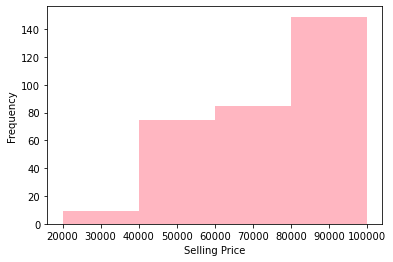

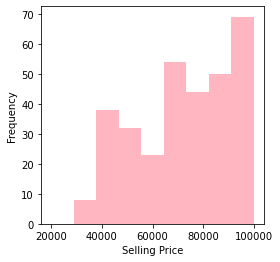

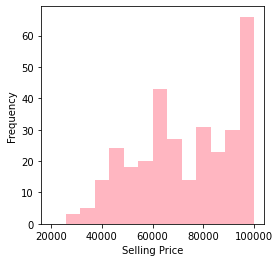

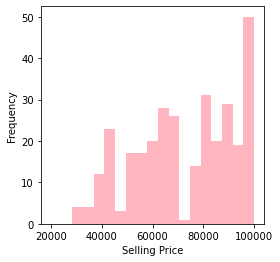

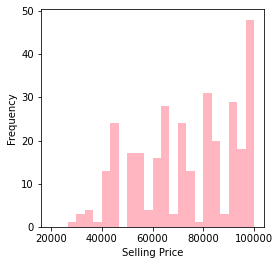

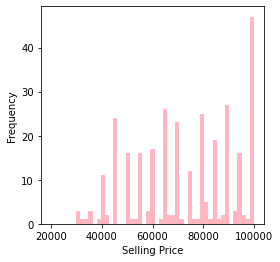

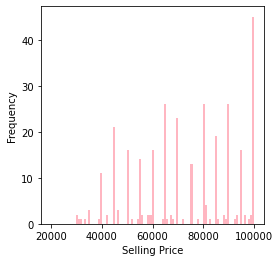

<Figure size 288x288 with 0 Axes>

In [26]:

bin_widths = [5, 10, 15, 20 ,25, 50, 100]
for i in bin_widths:
    bin_range = np.linspace(20000, 100000, i)
    plt.hist(auto_mpg_y, bins=bin_range, color = "lightpink")
    plt.xlabel("Selling Price")
    plt.ylabel("Frequency")
    plt.show()
    plt.figure(figsize=(4,4))

In [27]:
import plotly.express as px
fig = px.histogram(auto_mpg_df, x="selling_price", nbins=75, marginal = 'box', color_discrete_sequence = ['#00CC96'])

fig.update_layout(
    title="Histogram of Selling Price",
    title_x=0.5,
    yaxis_title="Frequency",
    xaxis_title="Selling Price",
)
fig.update_layout(height=1000, width=1000)
fig.show()
fig.write_html("Histogram_of_Selling_Price")

In [28]:
#Plotting the relationships between the label-Selling Price and the continuous features (Mileage, km driven, engine, max power) using a small multiple of scatter plots.

In [29]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (10, 10))
# ax1.scatter(auto_mpg_y, auto_mpg_X['mileage'], color = "lightblue")
# ax1.set_title("Selling Price vs Mileage")
# ax1.set(ylabel = "Mileage")
# ax1.set(xlabel = "Selling Price")

# ax2.scatter(auto_mpg_y, auto_mpg_X['km_driven'], color = "green")
# ax2.set_title("Selling Price vs Km Driven")
# ax2.set(ylabel = "Km Driven")
# ax2.set(xlabel = "Selling Price")

# ax3.scatter(auto_mpg_y, auto_mpg_X['engine'], color = "red")
# ax3.set_title("Selling Price vs Engine")
# ax3.set(ylabel = "Engine")
# ax3.set(xlabel = "Selling Price")

# ax4.scatter(auto_mpg_y, auto_mpg_X['max_power'], color = "blue")
# ax4.set_title("Selling Price vs Max Power")
# ax4.set(ylabel = "Max Power")
# ax4.set(xlabel = "Selling Price")

# fig.tight_layout()
# plt.show()

In [30]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

fig = make_subplots(rows=4, cols=1)

rows = ['mileage', 'km_driven', 'engine', 'max_power']

row_name = ['Mileage', 'Km Driven', 'Engine', 'Max Power']

for i in range(1, 5):
  row = rows[i - 1]
  fig.add_trace(
      go.Scatter(x = auto_mpg_y, y = auto_mpg_X[row], mode="markers", name = row_name[i-1]),
      row=i, col=1,
  )
  fig['layout']['xaxis' + str(i)]['title']='Selling Price'
  fig['layout']['yaxis' + str(i)]['title']= row_name[i-1]
  
fig.update_layout(height=1000, width=1000, title = "Selling Price vs Numerical Features", title_x = 0.5)
fig.show()
# fig.write_html("selling_price_vs_numerical_features_scatterplot.html")

In [31]:
# We can observe that there are just a few outliers in each relationship. Furthermore, it can be seen that the data is very dense on the left side and the skewness cannot be concluded since there is a very dense mass of plots

In [32]:
#Plotting the relationships between the label-Selling Price and the discrete features (fuel type, Seller type, transmission) using a small multiple of box plots.


In [33]:
# fig, axs = plt.subplots(2, 2, figsize = (10, 10))
# sns.boxplot(ax = axs[0,0], x = "fuel", y = auto_mpg_y, data = auto_mpg_X, palette = "Set3")
# axs[0,0].set_title("Selling Price vs Fuel Type")
# axs[0,0].set(ylabel = "Fuel Type")
# axs[0,0].set(xlabel = "Selling Price")

# sns.boxplot(ax = axs[0,1], x = "seller_type", y = auto_mpg_y, data = auto_mpg_X, palette = "RdPu")
# axs[0,1].set_title("Selling Price vs Seller Type")
# axs[0,1].set(ylabel = "Seller Type")
# axs[0,1].set(xlabel = "Selling Price")

# sns.boxplot(ax = axs[1,0], x = "transmission", y = auto_mpg_y, data = auto_mpg_X, palette = "RdPu")
# axs[1,0].set_title("Selling Price vs Transmission")
# axs[1,0].set(ylabel = "Transmission")
# axs[1,0].set(xlabel = "Selling Price")

# sns.boxplot(ax = axs[1,1], x = "owner", y = auto_mpg_y, data = auto_mpg_X, palette = "Set3")
# axs[1,1].set_title("Selling Price vs Owner Type")
# axs[1,1].set(ylabel = "Owner Type")
# axs[1,1].set(xlabel = "Selling Price")

# fig.tight_layout()
# plt.show()

In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

fig = make_subplots(rows=2, cols=2)

rows = ['fuel', 'seller_type', 'transmission', 'owner']

row_name = ['Fuel Type', 'Seller Type', 'Transmission', 'Owner Type']

for i in range(4):
  row = rows[i]
  fig.add_trace(
      go.Box(y = auto_mpg_df['selling_price'], x = auto_mpg_df[row], name = row_name[i]), row = math.floor(i/2) + 1, col = i%2 + 1)
  fig['layout']['xaxis' + str(i+1)]['title']='Selling Price'
  fig['layout']['yaxis' + str(i+1)]['title']= row_name[i]
  
fig.update_layout(height=1000, width=1000, title = "Selling Price vs Categorical Features", title_x = 0.5)

fig.show()
fig.write_html("boxplot_selling_price_vs_categorical_features.html")

In [35]:
# #Plotting the relationships between the features using a heatmap.
# plt.figure(figsize=(10,10))
# sns.heatmap(auto_mpg_X.corr(),cmap=plt.cm.Reds,annot=True)
# plt.title('Heatmap displaying the relationship betweennthe features of the data',
#          fontsize=13)
# plt.show()

In [36]:
import plotly.express as px
data=auto_mpg_X.corr()
fig = px.imshow(data)
fig.update_xaxes(side="bottom", tickangle=90)

fig.layout.height = 1000
fig.layout.width = 1000
fig.update_layout(title = "Correlation of Features ", title_x = 0.5)
fig.show()
# fig.write_html("heatmap_correlation_of_features.html")

In [37]:
fig.write_html("heatmap.html")

In [38]:
#Conculsions from Visualizations:-
# 1) linear regression is a good model to try since we are predicting a continuous dependent variable from a number of independent variables. We can assume y is alinear combination of x.

# 2) Seeing the histogram, we can see the data is approximately normal with the right number of bins as the data is 50% on the right and left of them mean which ticks off our normality condition.

# 3) Seeing the scatterplots, I can say that the spread of data is very similar for all numerical variables which is a good indicator of homoscedasticity.

# 4) I plotted the independent variables aginst each other and saw that the variables do not seem to be highly correlated and will not cause an issue of multicollinearity which satisfies our independence assumption.

# 5) One important point to note is that visualizations cannot strongly indicate anything, only once we test our model we can conclude if it is god or not.

### Cleaning and Fixing Data Part 2



In [39]:
auto_mpg_X['year'] =  2020 - auto_mpg_X['year']

In [40]:
#dropping the car name as it is irrelevant.
auto_mpg_X.drop(['name'],axis = 1,inplace=True)

#check out the dataset with new changes
auto_mpg_X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,14,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,10,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,13,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


### Encoding Categorical Features



In [41]:
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
for column in categorical_cols:
    
    tempdf = pd.get_dummies(auto_mpg_X[column], prefix=column)
    
    auto_mpg_X = pd.merge(
        left = auto_mpg_X,
        right = tempdf,
        left_index = True,
        right_index = True,
    )
    
    auto_mpg_X = auto_mpg_X.drop(columns=column)

In [42]:
auto_mpg_X.head()

,year,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,6,145500,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,6,120000,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,14,140000,17.70,1497.0,78.00,5.0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,10,127000,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
4,13,120000,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0


### Train\-test Split



In [43]:
X_train, X_test, y_train, y_test = train_test_split(auto_mpg_X, auto_mpg_y, test_size = 0.2)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25)

print("X Train Shape: " + str(X_train.shape))
print("X Test Shape: " + str(X_test.shape))
#print("X Validation Shape: " + str(X_val.shape))
print("Y Train Shape: " + str(y_train.shape))
print("Y Test Shape: " + str(y_test.shape))
#print("Y Validation Shape: " + str(y_val.shape))

X Train Shape: (6324, 20)
X Test Shape: (1582, 20)
Y Train Shape: (6324,)
Y Test Shape: (1582,)


### Scaling Data



In [44]:
# Choosing to scale the one hot encoded columns as well as they have been shown to improve performance in some cases
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[0])

[ 1.03743781  0.90886964 -1.60433339  2.06978292  0.0988563   2.73923621
 -0.07775075  0.92001269 -0.06668784 -0.90084145 -0.4070802   0.4560953
 -0.17599686 -0.39110437  0.39110437 -1.39925144 -0.14315651  1.71255243
 -0.02812942 -0.25915567]


In [45]:
ones_vector = np.ones((6324,1))
X_train_scaled = np.c_[X_train_scaled, ones_vector]
X_train_scaled.shape

(6324, 21)

In [46]:
# ones_vector2 = np.ones((1581,1))
# X_val_scaled = np.c_[X_val_scaled, ones_vector2]
# X_val_scaled.shape

In [47]:
ones_vector3 = np.ones((1582,1))
X_test_scaled = np.c_[X_test_scaled, ones_vector3]
X_test_scaled.shape

(1582, 21)

In [48]:
y_train.shape

(6324,)

In [49]:
X_train_scaled[0].shape

(21,)

### Data Modeling: Baseline Models



##### Linear Regression



In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [52]:
lin_reg_predicted_values = lin_reg.predict(X_test_scaled)

In [53]:
print("Linear Regression Baseline Metrics \n")
lin_reg_mse_val = mean_squared_error(y_test, lin_reg_predicted_values)
print("MSE: " + str(lin_reg_mse_val) + "\n")

lin_reg_mae_val = mean_absolute_error(y_test, lin_reg_predicted_values)
print("MAE: " + str(lin_reg_mae_val) + "\n")

lin_reg_rmse_val = np.sqrt(lin_reg_mse_val)
print("RMSE: " + str(lin_reg_rmse_val) + "\n")


lin_reg_r2_val = lin_reg.score(X_test_scaled, y_test)
print("R2: " + str(lin_reg_r2_val))

Linear Regression Baseline Metrics 

MSE: 206139836215.55112

MAE: 274031.02772448014

RMSE: 454026.25057979976

R2: 0.6934308880751209


##### Random Forest



In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [56]:
rf_predicted_values = rf.predict(X_test_scaled)

In [57]:
print("Random Forest Regressor Baseline Metrics \n")
rf_mse_val = mean_squared_error(y_test, rf_predicted_values)
print("MSE: " + str(rf_mse_val) + "\n")

rf_mae_val = mean_absolute_error(y_test, rf_predicted_values)
print("MAE: " + str(rf_mae_val) + "\n")

rf_rmse_val = np.sqrt(rf_mse_val)
print("RMSE: " + str(rf_rmse_val) + "\n")


rf_r2_val = rf.score(X_test_scaled, y_test)
print("R2: " + str(rf_r2_val))

Random Forest Regressor Baseline Metrics 

MSE: 16823816581.25051

MAE: 65302.9837237193

RMSE: 129706.65588646756

R2: 0.9749797874918854


##### Support Vector Regressor



In [58]:
from sklearn.svm import SVR

In [59]:
svr = SVR()
svr.fit(X_train_scaled, y_train)

SVR()

In [60]:
svr_predicted_values = svr.predict(X_test_scaled)

In [61]:
print("Support Vector Regressor Baseline Metrics \n")
svr_mse_val = mean_squared_error(y_test, svr_predicted_values)
print("MSE: " + str(svr_mse_val) + "\n")

svr_mae_val = mean_absolute_error(y_test, svr_predicted_values)
print("MAE: " + str(svr_mae_val) + "\n")

svr_rmse_val = np.sqrt(svr_mse_val)
print("RMSE: " + str(rf_rmse_val) + "\n")

svr_r2_val = svr.score(X_test_scaled, y_test)
print("R2: " + str(svr_r2_val))

Support Vector Regressor Baseline Metrics 

MSE: 715985123117.9004

MAE: 394511.7686484434

RMSE: 129706.65588646756



R2: -0.06480594617412949


##### Decision Tree Regressor



In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [64]:
d_tree_predicted_values = d_tree.predict(X_test_scaled)

In [65]:
print("Decision Tree Regressor Baseline Metrics \n")
d_tree_mse_val = mean_squared_error(y_test, d_tree_predicted_values)
print("MSE: " + str(d_tree_mse_val) + "\n")

d_tree_mae_val = mean_absolute_error(y_test, d_tree_predicted_values)
print("MAE: " + str(d_tree_mae_val) + "\n")

d_tree_rmse_val = np.sqrt(d_tree_mse_val)
print("RMSE: " + str(d_tree_rmse_val) + "\n")

d_tree_r2_val = d_tree.score(X_test_scaled, y_test)
print("R2: " + str(d_tree_r2_val))

Decision Tree Regressor Baseline Metrics 

MSE: 22448560186.279003

MAE: 74009.29751369575

RMSE: 149828.4358400601

R2: 0.9666147248069824


In [66]:
#Fifth Model

##### Gradient Boosting Regressor



In [67]:
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [69]:
gbr_predicted_values = gbr.predict(X_test_scaled)

In [70]:
print("Gradient Boosting Regressor Baseline Metrics \n")
gbr_mse_val = mean_squared_error(y_test, gbr_predicted_values)
print("MSE: " + str(gbr_mse_val) + "\n")

gbr_mae_val = mean_absolute_error(y_test, gbr_predicted_values)
print("MAE: " + str(gbr_mae_val) + "\n")

gbr_rmse_val = np.sqrt(gbr_mse_val)
print("RMSE: " + str(gbr_rmse_val) + "\n")

gbr_r2_val = gbr.score(X_test_scaled, y_test)
print("R2: " + str(gbr_r2_val))

Gradient Boosting Regressor Baseline Metrics 

MSE: 27602789502.533947

MAE: 95326.64814410842

RMSE: 166140.87246229913

R2: 0.9589494062875227


##### HistGradient Boosting Regressor



In [71]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [72]:
hgbr = HistGradientBoostingRegressor()
hgbr.fit(X_train_scaled, y_train)

HistGradientBoostingRegressor()

In [73]:
hgbr_predicted_values = hgbr.predict(X_test_scaled)

In [74]:
print("HistGradient Boosting Regressor Baseline Metrics \n")
hgbr_mse_val = mean_squared_error(y_test, hgbr_predicted_values)
print("MSE: " + str(hgbr_mse_val) + "\n")

hgbr_mae_val = mean_absolute_error(y_test, hgbr_predicted_values)
print("MAE: " + str(hgbr_mae_val) + "\n")

hgbr_rmse_val = np.sqrt(hgbr_mse_val)
print("RMSE: " + str(hgbr_rmse_val) + "\n")

hgbr_r2_val = hgbr.score(X_test_scaled, y_test)
print("R2: " + str(hgbr_r2_val))

HistGradient Boosting Regressor Baseline Metrics 

MSE: 19578300516.55454

MAE: 75543.35293589137

RMSE: 139922.48038308404

R2: 0.9708833464091705


##### XG Boost Regressor



In [75]:
from xgboost import XGBRegressor

/projects/df816efc-8285-4471-bb81-0077d1554410/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [76]:
xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [77]:
xgb_predicted_values = xgb.predict(X_test_scaled)

In [78]:
print("XG Boost Regressor Baseline Metrics \n")
xgb_mse_val = mean_squared_error(y_test, xgb_predicted_values)
print("MSE: " + str(xgb_mse_val) + "\n")

xgb_mae_val = mean_absolute_error(y_test, xgb_predicted_values)
print("MAE: " + str(xgb_mae_val) + "\n")

xgb_rmse_val = np.sqrt(hgbr_mse_val)
print("RMSE: " + str(xgb_rmse_val) + "\n")

xgb_r2_val = xgb.score(X_test_scaled, y_test)
print("R2: " + str(xgb_r2_val))

XG Boost Regressor Baseline Metrics 

MSE: 14743714495.209578

MAE: 63795.24258781655

RMSE: 139922.48038308404

R2: 0.9780732946030672


##### Lasso Regression



In [79]:
from sklearn import linear_model

In [80]:
lasso_reg = linear_model.Lasso()
lasso_reg.fit(X_train_scaled, y_train)

/projects/df816efc-8285-4471-bb81-0077d1554410/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.670e+12, tolerance: 4.169e+11



Lasso()

In [81]:
lasso_reg_predicted_values = lasso_reg.predict(X_test_scaled)

In [82]:
print("Lasso Regressor Baseline Metrics \n")
lasso_reg_mse_val = mean_squared_error(y_test, lasso_reg_predicted_values)
print("MSE: " + str(xgb_mse_val) + "\n")

lasso_reg_mae_val = mean_absolute_error(y_test, lasso_reg_predicted_values)
print("MAE: " + str(lasso_reg_mae_val) + "\n")

lasso_reg_rmse_val = np.sqrt(lasso_reg_mse_val)
print("RMSE: " + str(lasso_reg_rmse_val) + "\n")

lasso_reg_r2_val = lasso_reg.score(X_test_scaled, y_test)
print("R2: " + str(lasso_reg_r2_val))

Lasso Regressor Baseline Metrics 

MSE: 14743714495.209578

MAE: 273227.0843183583

RMSE: 453741.0747579707

R2: 0.6938158818589675


##### Ridge Regression



In [83]:
ridge_reg = linear_model.Ridge()
ridge_reg.fit(X_train_scaled, y_train)

Ridge()

In [84]:
ridge_reg_predicted_values = ridge_reg.predict(X_test_scaled)

In [85]:
print("Ridge Regressor Baseline Metrics \n")
ridge_reg_mse_val = mean_squared_error(y_test, ridge_reg_predicted_values)
print("MSE: " + str(ridge_reg_mse_val) + "\n")

ridge_reg_mae_val = mean_absolute_error(y_test, ridge_reg_predicted_values)
print("MAE: " + str(ridge_reg_mae_val) + "\n")

ridge_reg_rmse_val = np.sqrt(ridge_reg_mse_val)
print("RMSE: " + str(ridge_reg_rmse_val) + "\n")

ridge_reg_r2_val = ridge_reg.score(X_test_scaled, y_test)
print("R2: " + str(ridge_reg_r2_val))

Ridge Regressor Baseline Metrics 

MSE: 205879848510.85532

MAE: 273206.1738867672

RMSE: 453739.8467303211

R2: 0.6938175392008967


##### Elastic Net Regressor



In [86]:
from sklearn.linear_model import ElasticNet

In [87]:
elasticnet_reg = ElasticNet()
elasticnet_reg.fit(X_train_scaled, y_train)

ElasticNet()

In [88]:
elasticnet_reg_predicted_values = elasticnet_reg.predict(X_test_scaled)

In [89]:
print("Elastic Net Regressor Baseline Metrics \n")
elasticnet_reg_mse_val = mean_squared_error(y_test, elasticnet_reg_predicted_values)
print("MSE: " + str(elasticnet_reg_mse_val) + "\n")

elasticnet_reg_mae_val = mean_absolute_error(y_test, elasticnet_reg_predicted_values)
print("MAE: " + str(elasticnet_reg_mae_val) + "\n")

elasticnet_reg_rmse_val = np.sqrt(elasticnet_reg_mse_val)
print("RMSE: " + str(elasticnet_reg_rmse_val) + "\n")

elasticnet_reg_r2_val = elasticnet_reg.score(X_test_scaled, y_test)
print("R2: " + str(elasticnet_reg_r2_val))

Elastic Net Regressor Baseline Metrics 

MSE: 229647608329.2646

MAE: 251282.0410001831

RMSE: 479215.6177852143

R2: 0.6584703634499931


##### K\-Nearest Neighbors



In [90]:
from sklearn.neighbors import KNeighborsRegressor

In [91]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [92]:
knn_predicted_values = knn.predict(X_test_scaled)

In [93]:
print("K-Nearest Neighbors Baseline Metrics \n")
knn_mse_val = mean_squared_error(y_test, knn_predicted_values)
print("MSE: " + str(knn_mse_val) + "\n")

knn_mae_val = mean_absolute_error(y_test, knn_predicted_values)
print("MAE: " + str(knn_mae_val) + "\n")

knn_rmse_val = np.sqrt(knn_mse_val)
print("RMSE: " + str(knn_rmse_val) + "\n")

knn_r2_val = knn.score(X_test_scaled, y_test)
print("R2: " + str(knn_r2_val))

K-Nearest Neighbors Baseline Metrics 

MSE: 30669299579.40559

MAE: 93584.64715549936

RMSE: 175126.52448845547



R2: 0.954388923033853


### Comparing and Choosing Top 3 Baseline Models



In [94]:
baseline_r2_error_list = []
baseline_models_r2_errors = [lin_reg_r2_val, rf_r2_val, svr_r2_val, d_tree_r2_val, gbr_r2_val, hgbr_r2_val, xgb_r2_val, lasso_reg_r2_val,
                            ridge_reg_r2_val, elasticnet_reg_r2_val, knn_r2_val]

In [95]:
for model in baseline_models_r2_errors:
    baseline_r2_error_list.append(model)

In [96]:
import plotly.express as px

algo_name = ['LR', 'RF', 'SVR', 'DTREE', 'GBR', 'HGBR', 'XGB', 'LASSO', 'RIDGE', 'ELASTIC', 'KNN']

fig = px.bar(x = algo_name, y = baseline_r2_error_list, labels={
                     "x": "Models",
                     "y": "R Squared Score"}, color_discrete_sequence = ['#00CC96'])

fig.update_xaxes(tickangle=90)

fig.update_layout(height=500, width=500, title = "R Squared Score Comparison of Baseline Models", title_x = 0.5, xaxis = {'categoryorder':'total descending'})

fig.show()
fig.write_html("bar_graph_r_square_comparison_baseline_models.html")

### Improving Top 3 Baseline Models



##### Random Forest



In [97]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [25, 50, 75, 100]
max_depth = np.arange(5,10,1)
min_samples_split = [2, 5, 10]

random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split}

In [98]:
rf = RandomForestRegressor(random_state = 42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=1, random_state=42, n_jobs = -1)
rf_random.fit(X_train_scaled, y_train)
rf_random.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/projects/df816efc-8285-4471-bb81-0077d1554410/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning:

The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.



{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 9}

In [99]:
max_depth_list = rf_random.best_params_["max_depth"]
n_estimators_list = rf_random.best_params_["n_estimators"]

print("\n----------\n ")
rf = RandomForestRegressor(n_estimators=rf_random.best_params_["n_estimators"], max_depth = rf_random.best_params_["max_depth"], min_samples_split = rf_random.best_params_["min_samples_split"])
rf.fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(rf.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test_scaled, y_test)))

print("\n----------\n ")
rf_predicted_values = rf.predict(X_test_scaled)
rf_mse_val = mean_squared_error(y_test, rf_predicted_values)
print("MSE : " + str(rf_mse_val) + "\n")

rf_mae_val = mean_absolute_error(y_test, rf_predicted_values)
print("MAE : " + str(rf_mae_val) + "\n")

rf_rmse_val = np.sqrt(rf_mse_val)
print("RMSE : " + str(rf_rmse_val) + "\n")

rf_r2_val = rf.score(X_test_scaled, y_test)
print("R2 Score : " + str(rf_r2_val) + "\n")

print("\n----------\n ")
print("First 5 actual labels:")
display_actual = y_test.head()
display_labels = display_actual.to_string(index = False)
print(display_labels)

print("\nFirst 5 predicted labels (rounded off):")
for i in range(5):
    print(round(rf_predicted_values[i]))


----------
 


Training set score: 0.98
Test set score: 0.97

----------
 
MSE : 20313662781.396877

MAE : 78447.36666043979

RMSE : 142526.00738600965

R2 Score : 0.9697897229707583


----------
 
First 5 actual labels:
 240000
 254999
5150000
 700000
 720000

First 5 predicted labels (rounded off):
415363
283163
5155082
590408
725910


##### Post\-Training Visualizations



In [100]:
rf_feature_importances = rf.feature_importances_
X_train_cols = list(X_train.columns)

In [101]:
X_train_cols.append('bias')

In [102]:
import plotly.express as px
fig = px.bar(y = rf_feature_importances, x = X_train_cols, color_discrete_sequence = ['#AB63FA'], labels={
                     "x": "Features",
                     "y": "Importance"})

fig.update_xaxes(tickangle=90)
fig.update_layout(yaxis=dict(
        range=[0, 1]
    ), height=1000, width=1000, title = "Feature Importance in Random Forest", title_x = 0.5, xaxis = {'categoryorder':'total descending'})
fig.show()
fig.write_html("feature_importance_rf.html")

In [103]:
import plotly.express as px

fig = px.scatter(x = y_test, y = rf_predicted_values, log_x = True, log_y = True, trendline = "ols", trendline_color_override="crimson", labels={
                     "x": "Actual Selling Price",
                     "y": "Predicted Selling Price "})


fig.layout.height = 1000
fig.layout.width = 1000

fig.update_layout(title = "True Selling Price vs Predicted Selling Price for Random Forest", title_x = 0.5)
fig.show()
fig.write_html("true_selling_vs_prediction_rf.html")

In [104]:
y = []
for i in range(1,1583):
    y.append(i)

In [105]:
fig = px.scatter(y,y_test - rf_predicted_values, color_discrete_sequence = ['#EF553B'], labels={
                     "x": "Actual Selling Price",
                     "y": "Predicted Selling Price "})

fig.update_layout(
    title="Error",
    yaxis_title="Index in Test Set",
    xaxis_title="Error Difference",
)
fig.layout.height = 1000
fig.layout.width = 1000
fig.update_layout(xaxis=dict(showgrid=True),
              yaxis=dict(showgrid=True), title = "Error in Prediction of Selling Price", title_x = 0.5
)

fig.show()
fig.write_html("error_in_selling_price_rf.html")

##### XG Boost Regressor



In [106]:
import xgboost

n_estimators_list = [50, 100]
learning_rate_list = [0.1, 0.2]
max_depth_list = [8, 9]

random_grid = {
    
    'max_depth': max_depth_list,
    'max_iter': n_estimators_list,
    'learning_rate': learning_rate_list 
}

In [107]:
xgb = XGBRegressor(random_state = 120)
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, cv = 5, random_state = 120, n_jobs = -1)
xgb_random.fit(X_train_scaled, y_train)
xgb_random.best_params_

/projects/df816efc-8285-4471-bb81-0077d1554410/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.

/projects/df816efc-8285-4471-bb81-0077d1554410/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/projects/df816efc-8285-4471-bb81-0077d1554410/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[07:05:28] WARNING: ../src/learner.cc:576: 
Parameters: { "max_iter" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




{'max_iter': 50, 'max_depth': 8, 'learning_rate': 0.2}

In [108]:
import pickle
max_depth_list = xgb_random.best_params_["max_depth"]
max_iter_list = xgb_random.best_params_["max_iter"]
learning_rate = xgb_random.best_params_["learning_rate"]

print("\n----------\n ")
xgb = XGBRegressor(n_estimators=xgb_random.best_params_["max_iter"], max_depth = xgb_random.best_params_["max_depth"], learning_rate = xgb_random.best_params_["learning_rate"])
xgb.fit(X_train_scaled, y_train)

print("Training set score: {:.2f}".format(rf.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test_scaled, y_test)))

print("\n----------\n ")
xgb_predicted_values = xgb.predict(X_test_scaled)
xgb_mse_val = mean_squared_error(y_test, xgb_predicted_values)
print("MSE : " + str(xgb_mse_val) + "\n")

xgb_mae_val = mean_absolute_error(y_test, xgb_predicted_values)
print("MAE : " + str(xgb_mae_val) + "\n")

xgb_rmse_val = np.sqrt(xgb_mse_val)
print("RMSE : " + str(xgb_rmse_val) + "\n")

xgb_r2_val = xgb.score(X_test_scaled, y_test)
print("R2 Score : " + str(xgb_r2_val) + "\n")

print("\n----------\n ")
print("First 5 actual labels:")
display_actual = y_test.head()
display_labels = display_actual.to_string(index = False)
print(display_labels)

print("\nFirst 5 predicted labels (rounded off):")
for i in range(5):
    print(round(xgb_predicted_values[i]))
    
# pickle.dump(xgb, open('model.pkl','wb'))


----------
 


Training set score: 0.98
Test set score: 0.97

----------
 
MSE : 15737985912.555859

MAE : 65965.98806890013

RMSE : 125451.12957863655

R2 Score : 0.97659462405096


----------
 
First 5 actual labels:
 240000
 254999
5150000
 700000
 720000

First 5 predicted labels (rounded off):
324252
291879
5153019
662526
699137


In [109]:
xgb_feature_importances = xgb.feature_importances_
X_train_cols = list(X_train.columns)

X_train_cols.append('bias')

import plotly.express as px
fig = px.bar(y = xgb_feature_importances, x = X_train_cols, color_discrete_sequence = ['#AB63FA'], labels={
                     "x": "Features",
                     "y": "Importance"})

fig.update_xaxes(tickangle=90)
fig.update_layout(yaxis=dict(
        range=[0, 1]
    ), height=1000, width=1000, title = "Feature Importance in XGBoost Regressor", title_x = 0.5, xaxis = {'categoryorder':'total descending'})
fig.show()
fig.write_html("feature_importance_xgboost.html")

In [110]:
import plotly.express as px

fig = px.scatter(x = y_test, y = xgb_predicted_values, log_x = True, log_y = True, trendline = "ols", trendline_color_override="crimson", labels={
                     "x": "Actual Selling Price",
                     "y": "Predicted Selling Price "})


fig.layout.height = 1000
fig.layout.width = 1000

fig.update_layout(title = "True Selling Price vs Predicted Selling Price for XG Boost", title_x = 0.5)
fig.show()
fig.write_html("true_selling_price_vs_prediction_xgboost.html")

In [111]:
fig = px.scatter(y,y_test - xgb_predicted_values, color_discrete_sequence = ['#EF553B'], labels={
                     "x": "Actual Selling Price",
                     "y": "Predicted Selling Price "})

fig.update_layout(
    title="Error",
    yaxis_title="Index in Test Set",
    xaxis_title="Error Difference",
)
fig.layout.height = 1000
fig.layout.width = 1000
fig.update_layout(xaxis=dict(showgrid=True),
              yaxis=dict(showgrid=True), title = "Error in Prediction of Selling Price of XG Boost", title_x = 0.5
)

fig.show()
fig.write_html("error_in_selling_price_xgboost.html")

##### K\-Nearest Neighbors



In [112]:
from sklearn.neighbors import KNeighborsRegressor


In [113]:
knn = KNeighborsRegressor(n_neighbors = 5).fit(X_train_scaled, y_train)

In [114]:
print("\n ----XXXXXXX------\n ")


print("Training set score: {:.2f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test_scaled, y_test)))

print("\n ----XXXXXXX------\n ")
knn_predicted_values = knn.predict(X_test_scaled)
knn_mse_val = mean_squared_error(y_test, knn_predicted_values)
print("MSE : " + str(knn_mse_val) + "\n")

knn_mae_val = mean_absolute_error(y_test, knn_predicted_values)
print("MAE : " + str(knn_mae_val) + "\n")

knn_rmse_val = np.sqrt(knn_mse_val)
print("RMSE : " + str(knn_rmse_val) + "\n")

knn_r2_val = knn.score(X_test_scaled, y_test)
print("R2 Score : " + str(knn_r2_val) + "\n")

print("\n ----XXXXXXX------\n ")
print("First 5 actual labels:")
display_actual = y_test.head()
display_labels = display_actual.to_string(index = False)
print(display_labels)

print("\nFirst 5 predicted labels (rounded off):")
for i in range(5):
    print(round(knn_predicted_values[i]))


 ----XXXXXXX------
 


Training set score: 0.96


Test set score: 0.95

 ----XXXXXXX------
 


MSE : 30669299579.40559

MAE : 93584.64715549936

RMSE : 175126.52448845547



R2 Score : 0.954388923033853


 ----XXXXXXX------
 
First 5 actual labels:
 240000
 254999
5150000
 700000
 720000

First 5 predicted labels (rounded off):
343000
232000
5150000
636000
560000


In [115]:
import plotly.express as px

fig = px.scatter(x = y_test, y =knn_predicted_values, log_x = True, log_y = True, trendline = "ols", trendline_color_override="crimson", labels={
                     "x": "Actual Selling Price",
                     "y": "Predicted Selling Price "})


fig.layout.height = 1000
fig.layout.width = 1000

fig.update_layout(title = "True Selling Price vs Predicted Selling Price of KNN", title_x = 0.5)
fig.show()
fig.write_html("true_selling_price_vs_prediction_knn.html")

In [116]:
fig = px.scatter(y,y_test - knn_predicted_values, color_discrete_sequence = ['#EF553B'], labels={
                     "x": "Actual Selling Price",
                     "y": "Predicted Selling Price "})

fig.update_layout(
    title="Error",
    yaxis_title="Index in Test Set",
    xaxis_title="Error Difference",
)
fig.layout.height = 1000
fig.layout.width = 1000
fig.update_layout(xaxis=dict(showgrid=True),
              yaxis=dict(showgrid=True), title = "Error in Prediction of Selling Price of KNN", title_x = 0.5
)

fig.show()
fig.write_html("error_in_selling_price_knn.html")

### Comparing Top 3 Models & Choosing the Best



In [117]:
errors_mse = []
errors_mae = []
errors_rmse = []
errors_r2 = []

In [118]:
mse = [rf_mse_val, xgb_mse_val, knn_mse_val]
for model in mse:
    errors_mse.append(model)
 
mae = [rf_mae_val, xgb_mae_val, knn_mae_val]
for model in mae:
    errors_mae.append(model)
    
rmse = [rf_rmse_val, xgb_rmse_val, knn_rmse_val]
for model in rmse:
    errors_rmse.append(model)
    

r2 = [rf_r2_val, xgb_r2_val, knn_r2_val]
for model in r2:
    errors_r2.append(model)

In [119]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

fig = make_subplots(rows=2, cols=2)

row_name = ['MSE', 'MAE', 'RMSE', 'R2']

row_name_full = ['Mean Square Error', 'Mean Absolute Error', 'Root Mean Square Error', 'R Squared']

algo_name = ['RF', 'XGB', 'KNN']

model_name = [errors_mse, errors_mae, errors_rmse, errors_r2]

for i in range(4):
  row = rows[i]
  fig.add_trace(
      go.Bar(y = model_name[i], x = algo_name, name = row_name_full[i]), row = math.floor(i/2) + 1, col = i%2 + 1)
  fig['layout']['yaxis' + str(i+1)]['title']= row_name[i]

fig.update_layout(height=1000, width=1000, title = "Metric Comparison of Top 3 Algorithms", title_x = 0.5)

fig.show()
fig.write_html("comparison_top_3_algos.html")